In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from functions import *

In [8]:
lihue_tmax = get_obs('USW00022536.dly', 'TMAX')
lihue_tmin = get_obs('USW00022536.dly', 'TMIN')

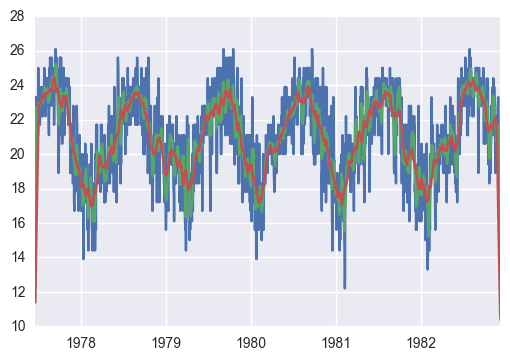

In [9]:
data1 = lihue_tmin[10000:12000]
plt.plot(data1['date'], data1['value'])
plot_smoothed(data1, win=10)
plot_smoothed(data1, win=30)

import urllib.request
datastations = ['USW00022536','USW00023188','USW00014922','RSM00030710']
for station in datastations:
    url = 'https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/gsn/{}.dly'.format(station)
    urllib.request.urlretrieve(url,'{}.dly'.format(station))

In [12]:
stations = {}
for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
    
        stations[fields[0]] = ' '.join(fields[4:])

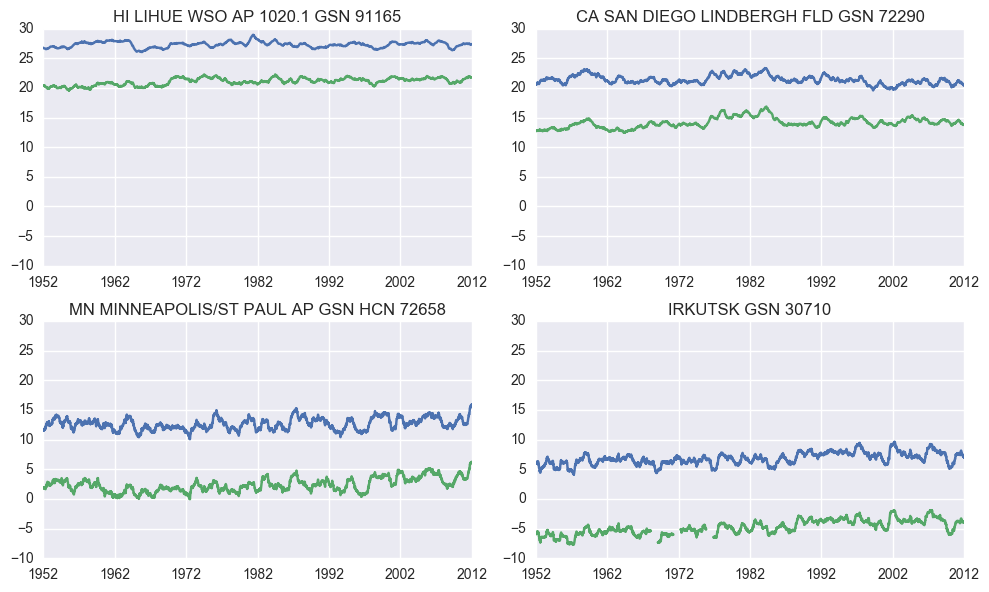

In [13]:
plt.figure(figsize=(10,6))
for (i, station) in enumerate(datastations):
    
    data1 = get_obs(fname='{}.dly'.format(station), obs='TMAX')
    data2 = get_obs(fname='{}.dly'.format(station), obs='TMIN')
    
    plt.subplot(2,2,i+1)
    plot_smoothed(data1, win=365)
    plot_smoothed(data2, win=365)
    
    plt.axis(xmin = np.datetime64('1952'), xmax=np.datetime64('2012'),
             ymin = -10, ymax = 30)
    plt.title('{}'.format(stations[station]))
    plt.tight_layout()

In [103]:
def selectyear(data, year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    return data[(data['date']>= start) & (data['date'] < end)]['value']

In [107]:
selectyear(lihue_tmin, 1951)

array([ 17.8,  17.8,  17.2,  18.3,  20. ,  21.7,  22.2,  21.7,  22.2,
        22.2,  21.7,  21.7,  19.4,  18.9,  18.3,  18.3,  19.4,  20.6,
        16.7,  14.4,  14.4,  17.2,  15. ,  12.8,  14.4,  13.3,  15. ,
        14.4,  17.8,  18.3,  16.7,  16.7,  17.2,  16.7,  17.8,  14.4,
        12.2,  13.3,  13.9,  12.8,  14.4,  14.4,  18.9,  19.4,  20. ,
        18.3,  18.3,  18.9,  20. ,  18.3,  19.4,  13.3,  11.7,  17.8,
        17.2,  17.8,  21.1,  22.2,  20.6,  22.2,  19.4,  20. ,  18.3,
        17.8,  17.8,  17.2,  16.1,  18.9,  18.9,  18.9,  17.8,  16.7,
        15.6,  13.3,  13.9,  15.6,  15.6,  21.7,  20.6,  18.3,  15.6,
        14.4,  17.2,  17.8,  18.9,  20. ,  18.9,  18.3,  18.3,  20.6,
        20. ,  18.9,  18.3,  21.1,  16.7,  21.7,  21.1,  21.7,  17.2,
        16.7,  17.8,  18.3,  16.1,  19.4,  20.6,  18.3,  18.3,  17.2,
        18.9,  21.7,  21.7,  21.7,  21.1,  20.6,  20.6,  20. ,  21.7,
        20. ,  20. ,  19.4,  18.3,  21.7,  22.2,  22.8,  20. ,  19.4,
        17.2,  22.2,

In [109]:
lihue_tmin_all = np.vstack([selectyear(lihue_tmin, year)[:365] for year in range(1951, 2014+1)])
lihue_tmax_all = np.vstack([selectyear(lihue_tmax, year)[:365] for year in range(1951, 2014+1)])

In [110]:
lihue_tmin_all.shape

(64, 365)

In [111]:
lihue_tmin_recordmin, lihue_tmin_recordmax = np.min(lihue_tmin_all, axis = 0 ), np.max(lihue_tmin_all, axis = 0 )
lihue_tmax_recordmin, lihue_tmax_recordmax = np.min(lihue_tmax_all, axis = 0 ), np.max(lihue_tmax_all, axis = 0 )

In [112]:
lihue_tmin_recordmin

array([ 12.8,  13.9,  13.9,  15. ,  13.9,  13.3,  11.7,  11.7,  13.9,
        13.3,  13.3,  12.8,  12.2,  12.8,  12.8,  12.2,  11.1,  11.7,
        13.3,  10.6,  11.1,  10. ,  10.6,  12.2,  11.7,  11.7,  13.3,
        13.9,  13.3,  13.3,  12.2,  12.2,  13.3,  13.9,  12.8,  13.3,
        12.2,  13.3,  13.3,  12.2,  12.8,  13.3,  12.8,  12.8,  13.3,
        13.3,  12.8,  12.8,  11.7,  12.8,  13.3,  11.7,  11.1,  13.3,
        13.3,  12.8,  13.3,  12.8,  13.3,  12.2,  13.3,  13.9,  14.4,
        13.3,  14.4,  13.3,  13.9,  13.9,  13.9,  14.4,  14.4,  12.8,
        12.2,  11.7,  11.7,  11.1,  13.9,  14.4,  15. ,  14.4,  13.9,
        12.8,  11.7,  10.6,  13.3,  13.3,  13.9,  14.4,  13.3,  15. ,
        13.3,  14.4,  15. ,  15.6,  15. ,  16.1,  15.6,  16.1,  15. ,
        15. ,  16.1,  14.4,  15.6,  13.9,  15. ,  15.6,  14.4,  15. ,
        15. ,   nan,  13.9,  13.3,  15. ,  13.9,  14.4,  15.6,  15. ,
        16.7,  15. ,  15. ,  16.7,  14.4,  16.1,  16.7,  16.7,  17.2,
        16.1,  16.7,

In [113]:
len(np.min(lihue_tmin_all, axis=0))

365

(0.0, 356, 10.0, 35.0)

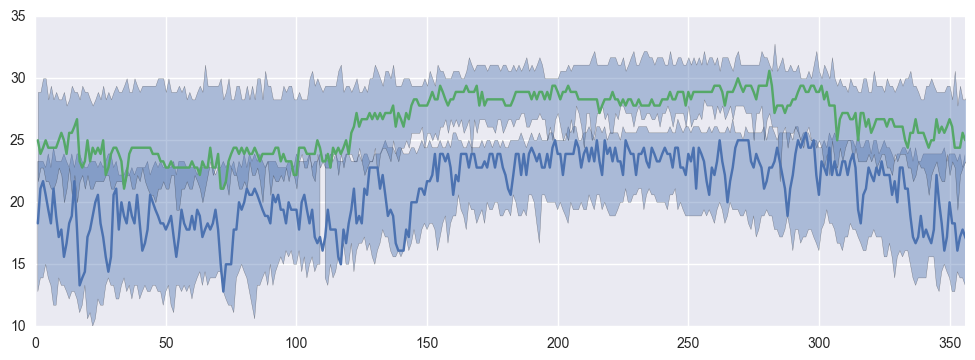

In [118]:
plt.figure(figsize=(12,4))
days = np.arange(1,365+1)

plt.fill_between(days, np.min(lihue_tmin_all, axis=0), np.max(lihue_tmin_all, axis=0), alpha=0.4)

plt.plot(days, selectyear(lihue_tmin, 2009))


plt.fill_between(days, np.min(lihue_tmax_all, axis=0), np.max(lihue_tmax_all, axis=0), alpha=0.4)

plt.plot(days, selectyear(lihue_tmax, 2009))

plt.axis(xmax=356)

In [87]:
np.min(lihue_tmin_all, axis=0)

array([ 17.8,  15.6,  16.1,  16.7,  16.7,  16.7,  18.9,  21.1,  20.6,
        21.7,  21.7,  21.1,  20. ,  20. ,  20.6,  18.3,  20.6,  20.6,
        20.6,  19.4,  20.6,  20. ,  20.6,  20. ,  21.1,  18.3,  17.2,
        20. ,  21.1,  17.2,  14.4,  13.9,  15.6,  17.8,  20. ,  15.6,
        17.2,  16.1,  17.8,  18.9,  18.9,  20. ,  18.9,  18.3,  20. ,
        19.4,  20. ,  19.4,  20.6,  20. ,  19.4,  18.9,  20. ,  19.4,
        19.4,  18.9,  17.8,  18.9,  16.1,  17.8,  19.4,  21.1,  20. ,
        21.7,  20.6,  21.7,  21.7,  20. ,  20.6,  21.7,  21.1,  21.7,
        20.6,  19.4,  17.2,  16.7,  15.6,  18.9,  20. ,  18.9,  21.7,
        21.1,  20. ,  21.7,  20. ,  20. ,  21.7,  20.6,  19.4,  19.4,
        19.4,  19.4,  20.6,  21.7,  21.7,  21.1,  22.2,  21.7,  21.7,
        22.2,  21.7,  20.6,  21.7,  20. ,  19.4,  22.2,  21.7,  19.4,
        20. ,  19.4,  18.3,  18.9,  20.6,  21.7,  20. ,  20. ,  21.7,
        21.7,  21.1,  18.3,  20.6,  20. ,  19.4,  20. ,  20. ,  22.2,
        22.8,  22.2,

In [88]:
np.max(lihue_tmin_all, axis=0)

array([ 17.8,  15.6,  16.1,  16.7,  16.7,  16.7,  18.9,  21.1,  20.6,
        21.7,  21.7,  21.1,  20. ,  20. ,  20.6,  18.3,  20.6,  20.6,
        20.6,  19.4,  20.6,  20. ,  20.6,  20. ,  21.1,  18.3,  17.2,
        20. ,  21.1,  17.2,  14.4,  13.9,  15.6,  17.8,  20. ,  15.6,
        17.2,  16.1,  17.8,  18.9,  18.9,  20. ,  18.9,  18.3,  20. ,
        19.4,  20. ,  19.4,  20.6,  20. ,  19.4,  18.9,  20. ,  19.4,
        19.4,  18.9,  17.8,  18.9,  16.1,  17.8,  19.4,  21.1,  20. ,
        21.7,  20.6,  21.7,  21.7,  20. ,  20.6,  21.7,  21.1,  21.7,
        20.6,  19.4,  17.2,  16.7,  15.6,  18.9,  20. ,  18.9,  21.7,
        21.1,  20. ,  21.7,  20. ,  20. ,  21.7,  20.6,  19.4,  19.4,
        19.4,  19.4,  20.6,  21.7,  21.7,  21.1,  22.2,  21.7,  21.7,
        22.2,  21.7,  20.6,  21.7,  20. ,  19.4,  22.2,  21.7,  19.4,
        20. ,  19.4,  18.3,  18.9,  20.6,  21.7,  20. ,  20. ,  21.7,
        21.7,  21.1,  18.3,  20.6,  20. ,  19.4,  20. ,  20. ,  22.2,
        22.8,  22.2,

In [90]:
lihue_tmin_all.size

21440